In [1]:
!pip install kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Loading cifar10 dataset

In [15]:
from tensorflow.keras import datasets
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
# checking the loaded data
print("Training data" , x_train.shape)
print("Train label data" , y_train.shape)
print("Test data" , x_test.shape)
print("Test label data" , y_test.shape)

Training data (50000, 32, 32, 3)
Train label data (50000, 1)
Test data (10000, 32, 32, 3)
Test label data (10000, 1)


# Preprocessing the data

In [5]:
# scale values between 0 and 1
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [6]:
# verification of scaling
print("pixel values before scaling:" , x_train[0][0][0] * 255)
print("pixel values after scaling:" , x_train[0][0][0])

pixel values before scaling: [59. 62. 63.]
pixel values after scaling: [0.23137255 0.24313726 0.24705882]


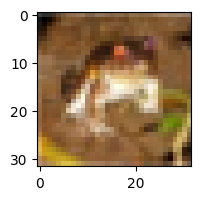

In [7]:
plt.figure(figsize= (15,2))
plt.imshow(x_train[0])

In [23]:
# Converting labels into one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [24]:
# Checking the new shapes of encoded labels
print("One-hot encoded y_train shape:", y_train.shape)
print("One-hot encoded y_test shape:", y_test.shape)

One-hot encoded y_train shape: (50000, 10)
One-hot encoded y_test shape: (10000, 10)


In [25]:
# Defining class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [26]:
# Checking the first label value
print("Training label:", y_train[0])
print("Test label:", y_test[0])

Training label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Test label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


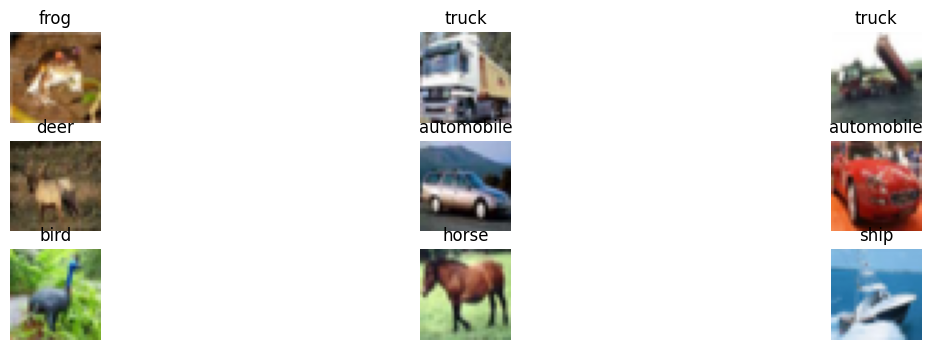

In [27]:
# Visualizing some sample images
plt.figure(figsize=(15, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

# Build CNN model

In [29]:
# Defining CNN model for image classification
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [30]:
# Printing the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compiling the model
model.compile(optimizer='adam' ,
              loss= 'categorical_crossentropy' ,
              metrics= ['accuracy'])

# Train the Model

In [33]:
# Training and validating the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2857 - loss: 2.8465 - val_accuracy: 0.4303 - val_loss: 1.5444
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4627 - loss: 1.4689 - val_accuracy: 0.5425 - val_loss: 1.2896
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5423 - loss: 1.2758 - val_accuracy: 0.5745 - val_loss: 1.2017
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6014 - loss: 1.1279 - val_accuracy: 0.5897 - val_loss: 1.2000
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6388 - loss: 1.0363 - val_accuracy: 0.6032 - val_loss: 1.1418
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6678 - loss: 0.9610 - val_accuracy: 0.6322 - val_loss: 1.0733
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6946 - loss: 0.8833 - val_accuracy: 0.6378 - val_loss: 1.0587
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7134 - loss: 0.8239

In [34]:
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:" , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6512 - loss: 1.0835
Test accuracy: 0.652899980545044


In [35]:
# Making predictions on new images
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
# Displaying first five images as predicted class
for i in range(5):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])
    print(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")

Predicted: cat, True: cat
Predicted: ship, True: ship
Predicted: ship, True: ship
Predicted: ship, True: airplane
Predicted: deer, True: frog


#Visulaize Prediction

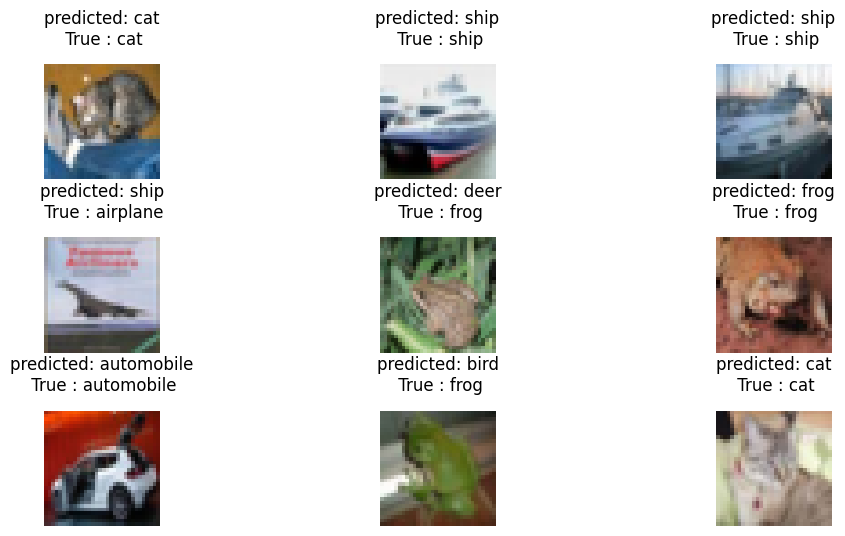

In [42]:
# Visualizing images
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range (9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i])
  predicted_class = np.argmax(predictions[i])
  true_class = np.argmax(y_test[i])
  plt.title(f"predicted: {class_names[predicted_class]}\n True : {class_names[true_class]}" , y = 1.1 )
  plt.axis('off')
plt.show()